<a href="https://colab.research.google.com/github/Shk-tech/my-colab-learning-material/blob/main/Copy_of_aice_test_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1
Pandas 함수로 2개 데이터 파일을 읽고 합쳐서 1개의 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
 - heart_failure_a.json파일을 읽어 데이터프레임 변수명 df_a에 할당하세요.
 - heart_failure_b.json 파일을 읽어 데이터 프레임 변수명 df_b에 할당하세요.
 - df_a, df_b를 합쳐서 하나의 데이터프레임으로 만드세요. 판다스의 merge를 활용하세요
    - 기준 열 (on) : 'person_id'
    - 합치는 방법(how) : 'inner'

df_a, df_b에는 존재하지만 df를 만들면서 사라진 데이터는 몇 개인지를 dropped_num 변수에 저장하세요.

In [ ]:
import pandas as pd
df_a = pd.read_json('heart_failure_a.json')
df_b = pd.read_json('heart_failure_b.json')
df = df_a.merge(df_b, on='person_id', how='inner')
df

,person_id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,smoking,time,DEATH_EVENT
0,2213596,75.0,N,582,N,20,Y,265000.00,130,0,4,1
1,9507810,55.0,N,7861,N,38,N,263358.03,136,0,6,1
2,7366585,65.0,N,146,N,20,N,162000.00,129,1,7,1
3,2520944,65.0,Y,160,Y,20,N,327000.00,116,0,8,1
4,4412932,90.0,Y,47,N,40,Y,204000.00,132,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
289,7626613,62.0,N,61,Y,38,Y,155000.00,143,1,270,0
290,1057066,55.0,N,1820,N,38,None,270000.00,139,0,271,0
291,1070274,45.0,N,2060,Y,60,N,742000.00,138,0,278,0
292,4871370,45.0,N,2413,N,38,N,140000.00,140,1,280,0


In [ ]:
len(df_a) + len(df_b) - len(df) * 2

5

In [ ]:
df_a.set_index('person_id').index.symmetric_difference(df_b.set_index('person_id').index)

Index([1277148, 1444425, 5318720, 5572688, 7207545], dtype='int64', name='person_id')

In [ ]:
sa = set(df_a['person_id'])
sb = set(df_b['person_id'])
inter = sa & sb
dropped_num = len(sa - inter) + len(sb - inter)

# 1
박출계수와 나이의 상관관계를 위해 jointplot 그래프를 그리세요.
 - seaborn의 jontplot을 활용
 - x축 : ejection_fraction
 - y축 : age
 - 색상(hue) : DEATH_EVENT

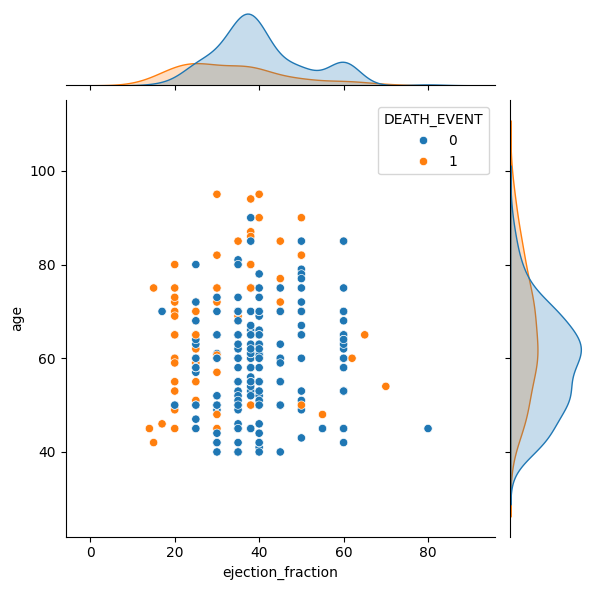

In [ ]:
import seaborn as sns
sns.jointplot(df, x='ejection_fraction', y='age', hue='DEATH_EVENT')

# 1
죽음과 당뇨, 흡연의 상관관계를 보기 위한 그래프를 그리세요.
 - seaborn의 violinplot을 이용
   - X축 : DEATH_EVENT
   - Y축 : platelets
   - hue : smoking
   - split : True

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

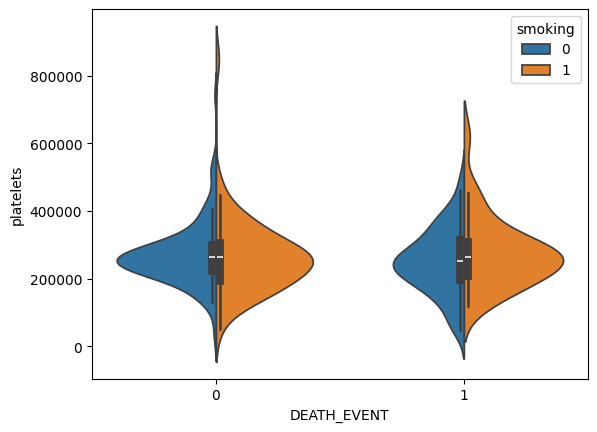

In [ ]:
sns.violinplot(df, x='DEATH_EVENT', y='platelets', hue='smoking', split='True')

# 1
time칼럼을 알아보기 위해 해당 칼럼의 histogram을 작성합니다. seaborn의 histplot 함수를 이용하세요.
 - x축 : time
 - bins : 20
 - 색상(hue) : DEATH_EVENT

<Axes: xlabel='time', ylabel='Count'>

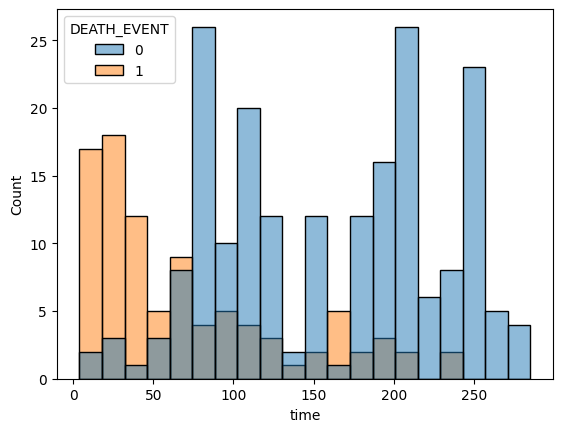

In [ ]:
sns.histplot(df, x='time', bins=20, hue='DEATH_EVENT')

# 1
불필요한 데이터를 삭제하고 이상치를 제거합니다.
 - person_id 열을 삭제하세요.
 - creatinine_phosphokinase 이 7000 이상인 데이터를 삭제하세요. 삭제된 데이터의 개수를 outlier 변수에 저장하세요.
 - 처리 결과를 df2에 저장

In [ ]:
df2 = df.drop('person_id', axis=1)
df2 = df2[~(df2['creatinine_phosphokinase'] > 7000)]
outlier = len(df) - len(df2)
outlier = (df['creatinine_phosphokinase'] > 7000).sum()

# 1
결측치를 처리합니다.
 - object타입의 범주형 데이터에는 'Unknown'을 넣으세요
 - 수치형 데이터는 중간값으로 채우세요.
 - 쳐리 결과를 df3에 저장

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 293
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       289 non-null    float64
 1   anaemia                   268 non-null    object 
 2   creatinine_phosphokinase  292 non-null    int64  
 3   diabetes                  280 non-null    object 
 4   ejection_fraction         292 non-null    int64  
 5   high_blood_pressure       277 non-null    object 
 6   platelets                 292 non-null    float64
 7   serum_sodium              292 non-null    int64  
 8   smoking                   292 non-null    int64  
 9   time                      292 non-null    int64  
 10  DEATH_EVENT               292 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 27.4+ KB


In [ ]:
df.isnull().sum()

person_id                    0
age                          3
anaemia                     24
creatinine_phosphokinase     0
diabetes                    12
ejection_fraction            0
high_blood_pressure         15
platelets                    0
serum_sodium                 0
smoking                      0
time                         0
DEATH_EVENT                  0
dtype: int64

In [ ]:
# df2.fillna({'anaemia':'Unknown', 'diabetes':'Unknown', 'high_blood_pressure':'Unknown'})
df3 = df2.copy()
df3[['anaemia', 'diabetes', 'high_blood_pressure']] = df2[['anaemia', 'diabetes', 'high_blood_pressure']].fillna('Unknown')
df3['age'] = df2['age'].fillna(df2['age'].median())
df3

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,smoking,time,DEATH_EVENT
0,75.0,N,582,N,20,Y,265000.0,130,0,4,1
2,65.0,N,146,N,20,N,162000.0,129,1,7,1
3,65.0,Y,160,Y,20,N,327000.0,116,0,8,1
4,90.0,Y,47,N,40,Y,204000.0,132,1,8,1
5,75.0,Y,246,N,15,N,127000.0,137,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...
289,62.0,N,61,Y,38,Y,155000.0,143,1,270,0
290,55.0,N,1820,N,38,Unknown,270000.0,139,0,271,0
291,45.0,N,2060,Y,60,N,742000.0,138,0,278,0
292,45.0,N,2413,N,38,N,140000.0,140,1,280,0


In [ ]:
df3 = df2.fillna(df2.median(numeric_only=True))
df3 = df3.fillna('Unknown')
df3.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_sodium                0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# 1
가이드에 따라 원-핫 인코딩을 수행합니다.
 - 대상 : df3의 모든 범주형 데이터
 - 활용 함수 : pandas 의 get_dummies
 - 전처리가 반영된 결과를 df4에 저장하세요.

In [ ]:
df4 = pd.get_dummies(df3)

# 1
 - 데이터를 입력 X와 타깃 y로 분리하시오.
   - y : DEATH_EVENT
   - X : DEATH_EVENT 외 컬럼
 - sklearn의 train_test_split 함수를 활용하여 학습데이터와 테스트 데이터로 분리하시오.
   - random_state : 42
   - 학습데이터 80%, 훈련데이터 20%

# 1
 - RobustScaler를 활용하여 입력 데이터 X_train, X_test에 대한 스케일링을 진행하시오.
   - X_train : fit_transform 활용
   - X_test : transform 활용


In [ ]:
X = df4.drop('DEATH_EVENT', axis=1)
y = df4['DEATH_EVENT']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)